# HUB4045F 2024: Medical Imaging and Image Processing

**Name**: Bonga Njamela 
<br>
**Student Number**: NJMLUN002
<br>
**Email Address**: njmlun002@myuct.ac.za
<br>
**Date**: 11 March 2024

## Plagiarism Declaration

1. I know that plagiarism is wrong. Plagiarism is to use another’s work and pretend it is one’s own.
2. Each significant contribution to, and quotation in this assignment that I have taken from the work(s) of other people has been attributed, and has been cited and referenced.
3. I have used the IEEE system for citation and referencing.
4. This assignment is my own work and I have not copied any other text.
5. I have not allowed, and will not allow, anyone to copy my work with the intention of passing it off as his or her own work. 

# Assignment 1: Mathematics of Imaging

## Imports and Notebook Configuration

### Installing $\texttt{matplotlib}$ and $\texttt{numpy}$:

The following notebook requires installation of $\texttt{matplotlib}$ and $\texttt{numpy}$. 

Open a Terminal or Command Prompt: Use a terminal or command prompt to execute the installation command.
<br><br>
Run the Installation Command: Use the following command to install Matplotlib and Numpy via pip:
<br><br>
\\$ $\texttt{pip install matplotlib}$<br>
\\$ $\texttt{pip install numpy}$
<br><br>
If you're using Python 3 and have multiple versions of Python installed, you might need to use pip3 instead of pip:
<br><br>
\\$ $\texttt{pip3 install matplotlib}$<br>
\\$ $\texttt{pip3 install numpy}$
<br><br>
Verify Installation: After the installation is complete, verify that Matplotlib is installed correctly by opening a Python interpreter and importing the library:
<br><br>
import matplotlib<br>
import numpy<br>
print(matplotlib.\_\_version\_\_)<br>
print(numpy.\_\_version\_\_)<br>
<br><br>
This should print the version number of Matplotlib and Numpy installed on your system. This can also be done by uncommenting the calls to $\texttt{print}$ in the cell below.

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Uncomment two lines below to verify installation
#print(matplotlib.__version__)
#print(np.__version__)

## 1 Radon Transform and CT Imaging

1. When an X-ray beam passes through the cross-sectional slice of a patient's anatomy represented by a function $f(x,y)$ as shown in Figure 1 below, the CT machine measures the initial intensity $I_0$ of the beam at the emitter at $P$, and the final intensities $I_1$ of the beam at the detector at $Q$. <br><br> At each point $f(x,y)$ in the cross-sectional slice, the tissue has an attenuation coefficient value $A(x,y)$ which depends on the nature of tissue located at the point $(x,y)$ [1]. Regions of higher density have a higher attenuation-coefficient, leading to a higher reduction in X-ray energy when compared to the energy loss for an X-ray beam that passes through a region of lower density along the slice. Effects of scattering and interference also lead to a reduction in the X-ray beam intensity [1]. The ratio between the intensity $I_0$ of transmitted energy to the intensity $I_1$ of the received energy is used to determine the average attenuation-coefficient of the material along the path of the beam. This ratio is related to the average attenuation-coefficient by the integral form of Beer's Law, given by [1] <br><br>\begin{align} \int_{x_0}^{x_1} \int_{y_0}^{y_1} A(x,y) dy dx & = ln \left(\frac{I_0}{I_1}\right) \end{align} <br>Therefore, the measured intensity of the X-ray can be implemented to determine the value of the intergral of the attenuation-coefficient along the line of the X-ray.<br><br> Suppose that the function $f(x,y)$ of the cross-sectional slice is a characteristic function representing the attenuation-coefficient $A(x,y)$. Then, along the any line $l_{t,\theta}$, the value of $f$ is set to 1 when the line passes through the cross-sectional slice, otherwise the value of $f$ is 1 [2]. We integrate $f$ along the lines described by each pair of values of $t$ and $\theta$. This system that accepts an input function $f(x,y)$ and produces a corresponding function in the $t$ and $\theta$, is known as the **Radon transform** and is denoted by $\mathcal{R}f$. Formally, the Radon transform is defined as [2],<br><br>\begin{align} \mathcal{R}f(t,\theta) & = \int_{l_{t,\theta}} f ds\\ & = \int_{s=-\infty}^{\infty} f(t\cos(\theta) - s\sin(\theta), t\sin(\theta) + s\cos(\theta))ds\end{align}<br> Thus, the intensity profile for a given angle $\theta$ can be obtained using $f(x,y)$ as the input to the Radon transform for a constant value of $t$. The integral sums the average attenuation-coefficent over an infinitesimal segment $ds$ for a preselected value of $t$ and $\theta$.<br><br>**Figure 1:** Illustrating the ideal case of an X-ray beam as it passes along the path between P and Q through the cross-sectional slice that is described by the characteristic function $f(x,y)$. The Radon transform takes the integral of the average attenuation-coefficient of the tissue along the trajectory of the X-ray beam. The energy at of the beam at $P$ is corresponds to the measurement of the initial intensity by the emission\detection machine while the energy of the beam at $Q$ corresponds to the final measurement of the intensity.
<center><img src="./img/region_illustration.png",width=900,height=300></center>
<br>* Image taken from HUB4045F Lectures on Mathematical Imaging<br><br>
2. Values of the Radon transform are mapped to a scale between 0 to 1 such that the value zero represent the color black, 0.5 represents neutral gray, and 1 represents white. This treatment of $t$ and $\theta$ as rectangular coordinates can also be performed using a section of the rainbow in place of the gray-scale mapping. The mapping produces a sinogram of the projections at various angles of $\theta$ ranging from $0$ to $\pi$ rad. A sinogram shows different values of the angle of projection $\theta$ along the $x$-axis and plots the corresponding projection position on a scale between 0 and 1 or in pixels. <br><br>

3. Let $(x_0, y_0)$ be a point in the region described by the characteristic function $f(x,y)$. Then for each value of $\theta$, there is a unique real number $t$ such that the line $l_{t,\theta}$ passes through the point $(x_0, y_0)$. The intensity of an X-ray beam that passes through the cross-sectional slice will be attenuated. If the trajectory of the beam follows a straight line of the form $l_{(x_0\cos(\theta)+y_0\sin(\theta)),\theta}$ for some angle $\theta$, then the attenuation-coefficient $A(x_0, y_0) \equiv f(x_0, y_0)$ of the patient's tissue located at the point $(x_0, y_0)$ corresponds to the value of the Radon transform $\mathcal{R}f(x_0\cos(\theta)+y_0\sin(\theta), \theta)$, for $0 \leq \theta \leq \pi$. <br><br> Using the average value of the line integrals in the Radon transform, we can recover $f(x_0, y_0)$. The average value of the line integrals is averaged for over all the lines that pass through a point, i.e. we can determine the _back projection_ of the Radon transform of the attenuation-coefficient function $f$ as <br><br>\begin{align}\mathcal{B}\mathcal{R}f(x,y) &= \frac{1}{\pi}\int_{\theta=0}^{\pi} \mathcal{R}f(x\cos(\theta) + y\sin(\theta), \theta)d\theta\end{align} <br>The values given by the Radon transform only measure the total accumulation of the attenuation-coefficient function along a given path. Thus, the back projection gives us a smoothed out version of the characteristic function $f$. <br><br> In the final step, we apply the _Filtered Back-Projection Theorem_ which allows us to recover the attenuation-coefficient function $f(x,y)$ using an application of the Fourier transform in the equation <br>\begin{align} f(x,y) &= \frac{1}{2}\mathcal{B}\left(\mathcal{F}^{-1}[|S|\mathcal{F}(\mathcal{Rf})(S,\theta)] \right)(x,y)\end{align}<br> Since there is only a finite number of values of the Radon transform of $f$, the Radon transform of a function $f$ is well-behaved and therefore has a Fourier transform. The Fourier transform of the Radon transform is filtered by multiplication with |S|, where S represent the polar coordinate $(S, \theta)$ corresponding to the cartesian coordinate $(x_0, y_0)$. The absolute value $|S|$ can be replaced with a low-pass filter $A$ which is obtained from the product of the absolute value with a window function that tends to zero outside the region described by $f$. In other words, the input is the Fourier transform of the Radon transform that passed through a low pass filter. The back projection of the inverse Fourier transform of the resulting producting is then halved to find the attenuation-coefficient function $f(x,y)$.

## 2 Implementing Beer's Law in X-Ray Attenuation

a) The following code considers the ideal case where a zero-width monochromatic X-ray beam, i.e. photons are quantized to the same energy level and the X-ray beam propagates at a constant frequency [1]. This means that the initial intensity $I_0$ of the X-ray beam, at a point $x$, is directly proportional to the number of photons per second passing through the point and the energy of each photon. 
<br><br> 
As the photon passes through each centimeter of a substance, a portion of the photons that pass through is absorbed depending on the attenuation coefficient of the substance. The intensity $I$ of the beam that is detected after it has passed through the medium is expected to be lower for substances with a larger attenuation coefficient than it would be for substances with a smaller attenuation coefficient. We note that the attenuation coefficient depends on the density of the substance in particular. This implies that the attenuation coefficient of bone is greater than the attenuation coefficient of air and soft tissue. Bone would therefore absorb more X-ray energy such that the decrease in intensity is more significant than that of air and soft tissue. We assume the values of the attenuation coefficient as non-negative with units are taken as the proportion of photons absorbed per centimeter of the medium. 
<br><br>
Suppose that the straight line path of an X-ray beam with initial intensity $I_0$, contains a medium between the point $x$ and $x + \Delta x$ whose attenuation coefficient is constant $A$ in that region [1]. If the final intensity at the beam detector is $I$, then, from the integral form of Beer's Law, it follows that 
\begin{align}
\int_{x}^{x+\Delta x} Adx &= ln\left(\frac{I_0}{I}\right)\\
e^{A\Delta x} & = \frac{I_0}{I} \\
\implies I & = I_0 \cdot e^{-A \Delta x}
\end{align}
Thus, we see that the intensity of the beam decays exponential as the thickness $\Delta x$ of the tissue increases. <br><br>
The following code uses the above equation to plot the attenuation of the X-ray for different thicknesses (in cm) of air, soft tissue and bone.

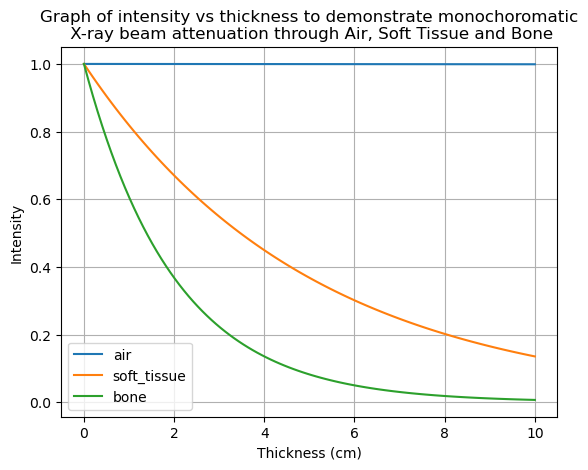

In [21]:
# Define attenuation coefficients for various materials
attenuation_coefficients = {'air': 0.0001, 'soft_tissue': 0.2, 'bone': 0.5}  # Attenuation coefficients in cm^-1

thickness = np.linspace(0, 10, 100)  # Thickness range in cm
I_0 = 1  # Initial intensity is 100%

# Loop to calculate and plot X-ray attenuation
for material, mu in attenuation_coefficients.items():
    # Apply Beer's Law to calculate final intensity I for each material
    I = I_0 * np.exp(-mu * thickness) #intensity decays exponentially
    
    # Generate intensity vs thickness plot
    plt.plot(thickness, I, label=material)

# Label the plot and add a legend
plt.ylabel('Intensity')
plt.xlabel('Thickness (cm)')
plt.title('Graph of intensity vs thickness to demonstrate monochoromatic\n X-ray beam attenuation through Air, Soft Tissue and Bone')
plt.legend()
plt.grid(True)
plt.show()

We see that the X-ray beam passes through air with negligible loss of energy since the intensity of the beam at the transmitter is equal to the intensity of the beam at the detector. This is illustrated by the horizontal line indicating 100% intensity at the detector. The plot also indicates that although soft tissue does absorb X-ray energy, it does not absorb as much energy as bone. This is indicated by the larger decay rate of the green curve corresponding to the intensity when the X-ray beam passes through a section bone of a given thickness between 0 and 10 cm. The plot shows that a bone of 10 cm thickness absorbs almost almost all the X-ray energy.

b) In CT imaging, the aim is to reconstruct the image of the material from the values of the intensity corresponding to the attenuated X-ray beam. This is done through filtered back projection, which applies Fourier transformations to the Radon Transform to recover the attenuation coefficient function $A(x,y)$. This Radon transform effectively maps the average attenuation coefficient of tissue to a grayscale or rainbow scale such that values of higher average attenuation coefficient have higher contrast compared to values of lower average attenuation coefficient. For example, when using grayscale, the average attenuation coefficient is mapped to the range of values between 0 and 1 such that:
- 0 (black or low contrast) corresponds to high intensity detections of X-rays that have passed through low density materials, such as air;
- 0.5 (neutral gray or medium contrast) corresponds to medium intensity detections from X-rays that have passed through materials,  such as soft tissue;
- 1 (white or high contrast) corresponds to low intensity readings from X-ray beams that have been highly attenuated from passing through high density materials, such as bone.

## 3 Intersection and Transformation: Exploring Lines and the Radon Transform

1. The equation of a unit circle in the cartesian coordinate system is given by \begin{align} x^2 + y^2 &= 1\end{align} so we can substitute the standard parametrization to obtain \begin{align} \left(\frac{\sqrt{3}}{4} - \frac{1}{2}s\right)^2 + \left(\frac{1}{4} + \frac{\sqrt{3}}{2}s\right)^2 &= 1\\ \frac{3}{4^2} -\frac{\sqrt{3}}{4}s + \frac{1}{4}s^2 + \frac{1}{4^2} + \frac{\sqrt{3}}{4}s + \frac{3}{4}s^2 & = 1\\ \implies s & = \pm \frac{\sqrt{3}}{2}\end{align} i.e. the line $l_{1/2, \pi/6}$ instersects the unit circle when $s_1 = \frac{\sqrt{3}}{2}$ and $s_2 = -\frac{\sqrt{3}}{2}$.

2. Given, \begin{align}f(x,y) & = \begin{cases} 
   x, & \text{if } x^2 + y^2 \leq 1 \\
   0, & \text{if } x^2 + y^2 > 1
   \end{cases} \end{align} we can parametrize $x$ as \begin{align} x &= t\cos(\theta) - s\sin(\theta)\end{align} and note that on the line $l_{t,\theta}$, we can define $f(x,y)$ as \begin{align} & f(t\cos(\theta) - s\sin(\theta), t\sin(\theta) + s\cos(\theta))\\ &:=    \begin{cases}
      t\cos(\theta)-s\sin(\theta) & \text{ if } t^2 + s^2 \leq 1\\ 
      0, &\text{ if } t^2 + s^2 > 
      1\end{cases}
   \end{align}
   On the line $l_{1/2,\pi/6}$, the value of $f$ is
   \begin{align}
   & f(t\cos(\theta) - s\sin(\theta), t\sin(\theta) + s\cos(\theta))\\ &:= 
   \begin{cases}
      \frac{\sqrt{3}}{4} - \frac{s}{2} & \text{ if } |s| \leq \sqrt{1-t^2}\\ 
      0, &\text{ if } |s| > \sqrt{1-t^2}\end{cases}
   \end{align}
   We note that $f$ does not depend on the value of $\theta$ and that whenever $|t| > 1$, the Radon transform $\mathcal{R}f(t,\theta)$ is always zero. This corresponds to a region outside of a circular disk defining the boundary of $f$. For a fixed value of $t$ such that $|t| \leq 1 $, the Radon transform of $f$ can be calculated from the integral definition as 
   \begin{align} 
   \mathcal{R}f(t,\theta) & := \int_{l_{t,\theta}} f ds \\ &= \int_{s=-\infty}^{\infty} f(t\cos(\theta) - s\sin(\theta), t\sin(\theta) + s\cos(\theta))ds\\  
   &= 2\int_{0}^{\sqrt{1 - t^2}}\frac{\sqrt{3}}{4} - \frac{s}{2}ds\\
   &= 2\left[\frac{\sqrt{3}}{4}s - \frac{s^2}{4}\right]_{0}^{s=\sqrt{1-t^2}}\\
   &=\frac{1}{2}\left(\sqrt{3(1-t^2)} - 1 + t^2\right)
   \end{align} 
   Therefore, the Radon transform exists at $t = \frac{1}{2}$, independent of the value of $\theta$, and is equal to,
   \begin{align}
   \mathcal{R} f(1/2,\pi/6)&=\frac{1}{2}\left[\sqrt{3(1-t^2)} - 1 + t^2\right]_{t=1/2}\\ &= \frac{1}{2}\left(\sqrt{\frac{9}{4}} -\frac{3}{4}\right)\\
   &= \frac{3}{8}
   \end{align}
   Hence,
   \begin{align}
   \mathcal{R}f(1/2,\pi/6) &= 
   \begin{cases}
   \frac{3}{8} &\text{ if } t^2 + s^2 \leq 1\\
      0 &\text{ if } t^2 + s^2 > 1
   \end{cases}
   \end{align}

## 4 Understanding Symmetry in the Radon Transform

The Radon transform of $f$ is defined, for each pair of real numbers $(t,\theta)$, by,

\begin{align}
\mathcal{R}f(t,\theta) & := \int_{l_{t,\theta}} f ds \\ 
&= \int_{s=-\infty}^{\infty} f(t\cos(\theta) - s\sin(\theta), t\sin(\theta) + s\cos(\theta))ds\\
\end{align}

Then

\begin{align}
\mathcal{R}f(-t,\theta + \pi) &= \int_{s=-\infty}^{\infty}f(-t\cos(\theta + \pi) + s\sin(\theta+\pi), -t\sin(\theta + \pi) - s\cos(\theta + \pi))ds
\end{align}

We can use appropriate trigonometric identities to decompose the function parameters into the desired form as shown in the definition above.

\begin{align}
-t\cos(\theta + \pi) + s\sin(\theta+\pi) & = -t[\cos(\theta)\cos(\pi) - \sin(\theta)\sin(\pi)]+s[\sin(\theta)\cos(\pi) + \cos(\theta)\sin(\pi)]
\end{align}

Since $\cos(\pi) = -1$ and $sin(\pi) = 0$, the first input in the parametrised version of $f$ is becomes

\begin{align}
-t\cos(\theta)(-1) - t(0) + s\sin(\theta)(-1) - s(0)  & = t\cos(\theta) - s\sin(\theta)
\end{align}

Similarly, the second input parameter of $f$ can be shown to be equivalent to the second input of the function in the definition. 

\begin{align}
-t[\sin(\theta)\cos(\pi) + \sin(\pi)\cos(\theta)] - s[\cos(\theta)cos(\pi) - \sin(\theta)\sin(\pi)] &= t\sin(\theta) + s\cos(\theta)
\end{align}

This implies that 

\begin{align}
\mathcal{R}f(-t,\theta + \pi) &= \int_{s=-\infty}^{\infty}f(t\cos(\theta) - s\sin(\theta), t\sin(\theta) + s\cos(\theta))ds
\end{align}

Hence,

\begin{align}
\mathcal{R}f(t,\theta) & = \mathcal{R}f(-t,\theta + \pi)
\end{align}

## References

[1] T.G. Feeman, _The Mathematics of Medical Imaging: A Beginner's Guide_, 2nd ed. Villanova, PA: Springer, 2015, pp. 1-10.<br>
[2] T.G. Feeman, _The Mathematics of Medical Imaging: A Beginner's Guide_, 2nd ed. Villanova, PA: Springer, 2015, pp. 13-36.<br>
[3] T.G. Feeman, _The Mathematics of Medical Imaging: A Beginner's Guide_, 2nd ed. Villanova, PA: Springer, 2015, pp. 39-45.<br>